In [16]:
import pytesseract
from PIL import Image
import jiwer
import re
from dotenv import load_dotenv
import difflib
from IPython.display import HTML, display

In [9]:
# Die Zeile muss man nicht laufen lassen, wenn man RENKU-Instanz verwendet
load_dotenv()

True

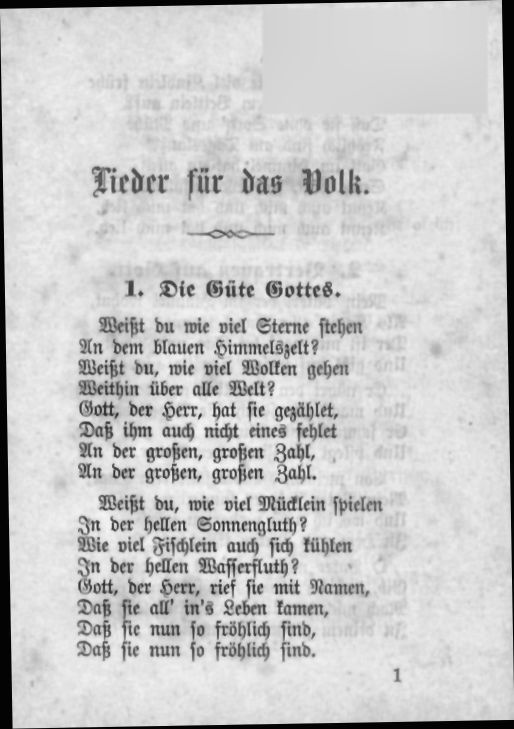

In [10]:
image_path = "../data/gray_enhanced.png"
im = Image.open(image_path)
im

In [11]:
prediction = pytesseract.image_to_string(im, lang="deu_latf")
print(prediction)

Lieder für das Polk.

---

1. Die Güte Gottes.

Weißt du wie viel Sterne ſtehen
An dem blauen Himmelszelt ?
Weißt du, wie viel Wolken gehen
Weithin über alle Welt?

Gott, der Herr, hat ſie gezählet,
Daß ihm auch nicht eines fehlet
An der großen, großen Zahl,
An der großen, großen Zahl.

Weißt du, wie viel Müklein ſpielen
In der hellen Sonnengluth?
Wie viel Fiſchlein auch ſich kühlen
In der hellen Waſſerfluth ?
Gott, der Herr, rief ſie mit Namen,
Daß ſie all' in's Leben kamen,
Daß ſie nun ſo fröhlich ſind,
Daß ſie nun ſo fröhlich ſind.




In [12]:
# Postprocess
prediction = prediction.replace("ſ", "s")
prediction = prediction.replace("-", "")


In [13]:
with open("../data/test_1.txt", encoding="utf-8") as f:
    gt = f.read()

In [17]:
# Vor der Fehlerberechnung entfernen wir Zeilenumbrüche und Leer-Zeichen (Sonst werden sie eventuell als Fehler mitgezählt)
p_x = re.sub("[\n]+", " ", prediction)
p_y = re.sub(r"[\s]+", " ", p_x)
gt_x = re.sub("[\n]+", " ", gt)
gt_y = re.sub(r"[\s]+", " ", gt_x)

In [18]:
# WER
error = jiwer.wer(
    gt_y,
    p_y
)
print(f"Word Error Rate (WER): {error:.4f}")

# CER
char_error = jiwer.cer(
    gt_y,
    p_y
)
print(f"Character Error Rate (CER): {char_error:.4f}")

Word Error Rate (WER): 0.0632
Character Error Rate (CER): 0.0075


In [19]:
transformation = jiwer.process_words(
    gt_y,
    p_y
)



print("\n--- Error-Analyse ---")
print(f"Insertions: {transformation.insertions}")
print(f"Deletions: {transformation.deletions}")
print(f"Substitutions: {transformation.substitutions}")

total_errors = transformation.insertions + transformation.deletions + transformation.substitutions
print(f"Total errors: {total_errors}")

reference_words = len(gt_y.split())
print(f"Reference words: {reference_words}")


--- Error-Analyse ---
Insertions: 2
Deletions: 0
Substitutions: 4
Total errors: 6
Reference words: 95


In [20]:
df = difflib.HtmlDiff()
res = df.make_file(gt_y.split(), p_y.split(),)
display(HTML(res))

f,1,Lieder,f,1,Lieder
,2,für,,2,für
,3,das,,3,das
n,4,Volk.,n,4,Polk.
,5,1.,,5,1.
,6,Die,,6,Die
,7,Güte,,7,Güte
,8,Gottes.,,8,Gottes.
,9,Weißt,,9,Weißt
,10,du,,10,du
,11,wie,,11,wie
